In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Number of samples
n_samples = 200

# First 10 general features (same as before)
general_features = [
    'Energy_Level', 'Mood', 'Appetite', 'Sleep_Quality', 'Digestion',
    'Stress_Level', 'Concentration', 'Physical_Activity', 'Hydration', 'Mood_Swings'
]

# 5 Basti-specific features (Vata-focused)
# Typical indicators post-Basti: bowel dryness, gas, lower back pain, urinary issues, constipation
basti_features = [
    'Bowel_Dryness',       # dryness or hardness of stool
    'Gas_Formation',       # bloating or flatulence
    'Lower_Back_Pain',     # discomfort or pain in lumbar region
    'Urinary_Frequency',   # number of times urination occurs
    'Constipation_Level'   # severity of constipation
]

# All feature names
all_features = general_features + basti_features

# Define categories for all features (categorical)
categories = {
    'Energy_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood': ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    'Appetite': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Sleep_Quality': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Digestion': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Stress_Level': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Concentration': ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    'Physical_Activity': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Hydration': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Mood_Swings': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Bowel_Dryness': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    'Gas_Formation': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    'Lower_Back_Pain': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    'Urinary_Frequency': ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    'Constipation_Level': ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe']
}

# Map each category to numeric scores for target calculation
score_map = {
    'Very Low': 1, 'Low': 2, 'Moderate': 3, 'High': 4, 'Very High': 5,
    'Very Sad': 1, 'Sad': 2, 'Neutral': 3, 'Happy': 4, 'Very Happy': 5,
    'Very Poor': 1, 'Poor': 2, 'Average': 3, 'Good': 4, 'Excellent': 5,
    'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Very Severe': 5
}

# Generate synthetic responses
data = {}
for feature, cats in categories.items():
    data[feature] = np.random.choice(cats, n_samples)

df = pd.DataFrame(data)

# Calculate realistic Vata levels (higher bowel dryness, gas, back pain, urinary issues, constipation → high Vata)
def calculate_vata(row):
    factors = [
        score_map[row['Bowel_Dryness']],
        score_map[row['Gas_Formation']],
        score_map[row['Lower_Back_Pain']],
        score_map[row['Urinary_Frequency']],
        score_map[row['Constipation_Level']]
    ]
    vata_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(vata_percent, 1)

# Calculate overall improvement (higher energy, digestion, sleep, hydration, concentration → better improvement)
def calculate_improvement(row):
    factors = [
        score_map[row['Energy_Level']],
        score_map[row['Appetite']],
        score_map[row['Digestion']],
        score_map[row['Sleep_Quality']],
        score_map[row['Hydration']],
        score_map[row['Concentration']]
    ]
    improvement_percent = (sum(factors) / (len(factors)*5)) * 100  # Normalize to 0-100%
    return round(improvement_percent, 1)

df['Vata_Level'] = df.apply(calculate_vata, axis=1)
df['Overall_Improvement'] = df.apply(calculate_improvement, axis=1)

# Save to Excel
df.to_excel('Basti_Feedback_Synthetic.xlsx', index=False)
print(df.head(10))


  Energy_Level        Mood   Appetite Sleep_Quality  Digestion Stress_Level  \
0         High         Sad   Moderate       Average    Average         High   
1    Very High     Neutral  Very High          Good    Average         High   
2     Moderate    Very Sad   Very Low     Excellent       Good         High   
3    Very High    Very Sad  Very High          Good  Excellent         High   
4    Very High       Happy       High       Average       Poor    Very High   
5          Low     Neutral  Very High       Average       Poor    Very High   
6     Moderate  Very Happy   Very Low          Good    Average          Low   
7     Moderate     Neutral       High     Very Poor    Average     Very Low   
8     Moderate       Happy  Very High          Poor  Very Poor         High   
9    Very High       Happy       High     Very Poor  Excellent          Low   

  Concentration Physical_Activity  Hydration Mood_Swings Bowel_Dryness  \
0          Poor          Moderate  Very High    Moderate

In [2]:
df

,Energy_Level,Mood,Appetite,Sleep_Quality,Digestion,Stress_Level,Concentration,Physical_Activity,Hydration,Mood_Swings,Bowel_Dryness,Gas_Formation,Lower_Back_Pain,Urinary_Frequency,Constipation_Level,Vata_Level,Overall_Improvement
0,High,Sad,Moderate,Average,Average,High,Poor,Moderate,Very High,Moderate,Severe,Moderate,Severe,Low,Very Severe,72.0,66.7
1,Very High,Neutral,Very High,Good,Average,High,Good,Very High,Low,High,Moderate,Moderate,Severe,Moderate,Very Severe,72.0,76.7
2,Moderate,Very Sad,Very Low,Excellent,Good,High,Average,Very High,Low,Low,Mild,Severe,Mild,Very High,Severe,68.0,60.0
3,Very High,Very Sad,Very High,Good,Excellent,High,Very Poor,Very Low,Moderate,High,None,Very Severe,Mild,High,None,52.0,76.7
4,Very High,Happy,High,Average,Poor,Very High,Average,Very Low,Very High,Very High,Very Severe,Very Severe,Mild,High,None,68.0,73.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Moderate,Very Happy,Very High,Poor,Poor,Very Low,Average,Very High,Very High,Very Low,Severe,Moderate,Very Severe,High,Severe,80.0,66.7
196,Moderate,Very Happy,Very High,Excellent,Very Poor,Low,Poor,Low,Moderate,Very High,Mild,Mild,Mild,Very Low,Very Severe,48.0,63.3
197,Very Low,Neutral,Very High,Poor,Very Poor,Very High,Poor,Moderate,Very High,Very Low,Very Severe,None,None,High,Moderate,56.0,53.3
198,Very High,Happy,Very High,Average,Good,High,Very Poor,Very High,Very Low,Very High,Severe,Very Severe,Mild,Moderate,Mild,64.0,63.3


In [3]:
import pandas as pandas 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
import pickle

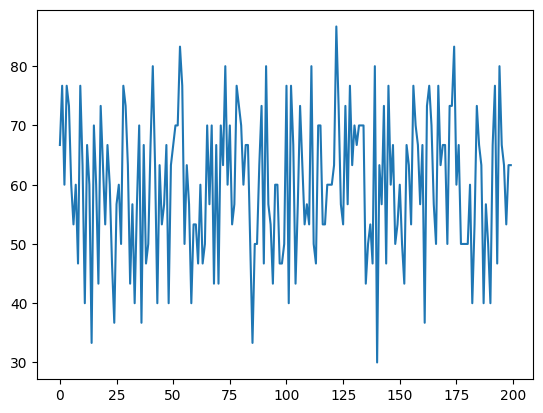

In [4]:
plt.plot(df['Overall_Improvement'])

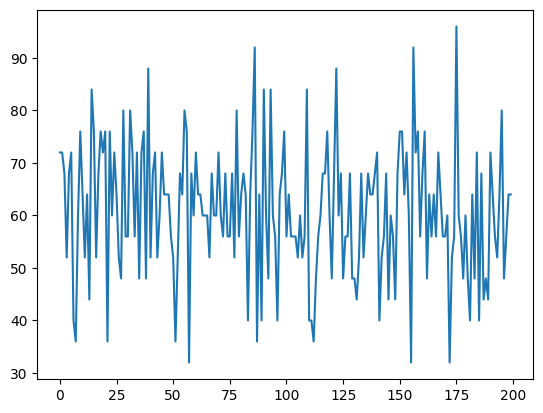

In [6]:
 plt.plot(df['Vata_Level'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Energy_Level         200 non-null    object 
 1   Mood                 200 non-null    object 
 2   Appetite             200 non-null    object 
 3   Sleep_Quality        200 non-null    object 
 4   Digestion            200 non-null    object 
 5   Stress_Level         200 non-null    object 
 6   Concentration        200 non-null    object 
 7   Physical_Activity    200 non-null    object 
 8   Hydration            200 non-null    object 
 9   Mood_Swings          200 non-null    object 
 10  Bowel_Dryness        200 non-null    object 
 11  Gas_Formation        200 non-null    object 
 12  Lower_Back_Pain      200 non-null    object 
 13  Urinary_Frequency    200 non-null    object 
 14  Constipation_Level   200 non-null    object 
 15  Vata_Level           200 non-null    flo

In [8]:
features = [col for col in df.columns if df[col].dtype == 'object']
target = [col for col in df.columns if df[col].dtype == 'float64']

order_map = {
    # General features (first 10)
    "Energy_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood": ['Very Sad', 'Sad', 'Neutral', 'Happy', 'Very Happy'],
    "Appetite": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Sleep_Quality": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Digestion": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Stress_Level": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Concentration": ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent'],
    "Physical_Activity": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Hydration": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Mood_Swings": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],

    # Basti-specific features (Vata-focused)
    "Bowel_Dryness": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    "Gas_Formation": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    "Lower_Back_Pain": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe'],
    "Urinary_Frequency": ['Very Low', 'Low', 'Moderate', 'High', 'Very High'],
    "Constipation_Level": ['None', 'Mild', 'Moderate', 'Severe', 'Very Severe']
}

categories_list = [order_map[col] for col in features]


In [9]:
preprocessor=ColumnTransformer([('OrdinalEncoder',OrdinalEncoder(categories=categories_list),features)
])

In [10]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2)

In [11]:
model=MultiOutputRegressor( XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
))


In [12]:
final_pipeline=Pipeline([('preprocessor',preprocessor),
                        ('XGB_model',model)])

In [13]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OrdinalEncoder',
                                                  OrdinalEncoder(categories=[['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Sad',
                                                                              'Sad',
                                                                              'Neutral',
                                                                              'Happy',
                                                                              'Very '
                                                                              'Happy'],
                                                                             ['Very '
                                                                              'Low',
                                                                              'Low',
                                                                              'Moderate',
                                                                              'High',
                                                                              'Very '
                                                                              'High'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good',
                                                                              'Excellent'],
                                                                             ['Very '
                                                                              'Poor',
                                                                              'Poor',
                                                                              'Average',
                                                                              'Good...
                                                             feature_weights=None,
                                                             gamma=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.05,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=4,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=na

In [14]:
y_pred=final_pipeline.predict(X_test)

In [16]:
r2_score(y_pred[:,1],y_test.iloc[:,1])

0.895784147778819

In [17]:
r2_score(y_pred[:,0],y_test.iloc[:,0])

0.8714352029631749

In [18]:
with open('Basti_model.pkl','wb') as f:
    pickle.dump(final_pipeline,f)